In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [ ]:
%pylab inline

In [ ]:
import skimage.io
from scipy.ndimage.filters import convolve

#note: this requires the starter code for the assignments!
from common.plotting import plot_mat

# Convolutions

The convolution operation applies the same filter at all locations in an image.

more info:
* http://deeplearning.net/tutorial/lenet.html
* https://en.wikipedia.org/wiki/Convolution 
* https://en.wikipedia.org/wiki/Kernel_%28image_processing%29

In [ ]:
lena = skimage.io.imread('08-lena.gif')
lena = lena / 255.
print("lena.shape")
print("lena.dtype")
imshow(lena)

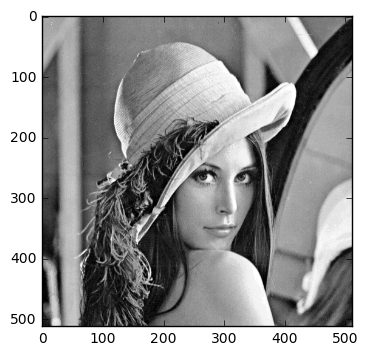

In [10]:
lena_bw = lena.mean(2)
imshow(lena_bw, cmap='gray')

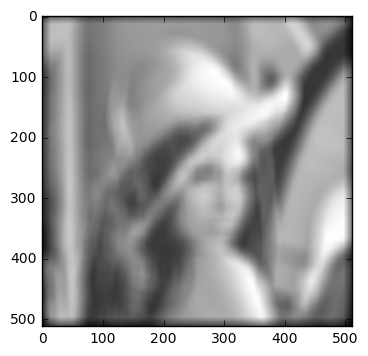

In [11]:
#the mode argument controls how the image is extended. constant mode simply pads it with zeros

imshow(convolve(lena_bw, ones((30, 30)), mode='constant'), cmap='gray')

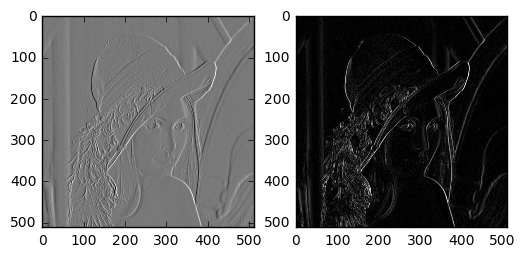

In [12]:
# This 2d convolution filter will detect vertical edges

filter_sobel_vertical = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
    ]

ev = convolve(lena_bw, filter_sobel_vertical)

subplot(121)
imshow(ev, cmap='gray')
subplot(122)
imshow(np.abs(ev), cmap='gray')


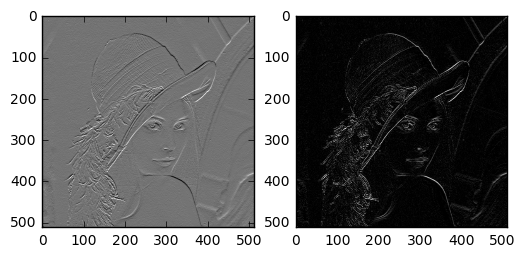

In [13]:
# This 2d convolution filter will detect horizontal edges

filter_sobel_horizontal = [
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
    ]

eh = convolve(lena_bw, filter_sobel_horizontal)

subplot(121)
imshow(eh, cmap='gray')
subplot(122)
imshow(np.abs(eh), cmap='gray')

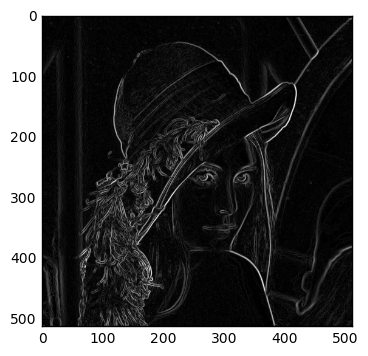

In [16]:
# Practical tip: in image processing we typically average the magnitudes
# of horizontal and vertical Sobel filters:

# edges = ev + eh
edges = np.abs(ev) + np.abs(eh) # Try uncommenting these!
edges = np.sqrt(ev**2 + eh**2)

imshow(edges, cmap="gray")

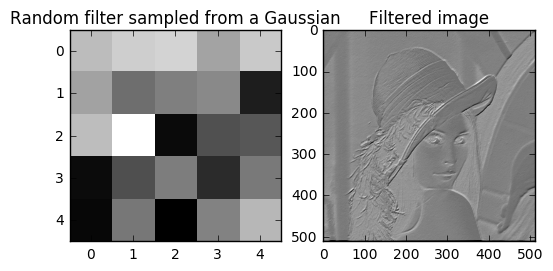

In [20]:
# we'll investigate convolutions with a random filter
# quite often we get a poor edge detector

filter = randn(5,5)

lena_filtered = convolve(lena_bw, filter, mode='constant')

subplot(1,2,1)
title('Random filter sampled from a Gaussian')
imshow(filter, interpolation='nearest', cmap='gray')

subplot(1,2,2)
title('Filtered image')
imshow(lena_filtered, cmap='gray')

# Pooling

Convolution transforms an image (e.g. detects edges). Pooling combines convolution's output in a small neighborhood to achieve invariance to small shifts of the input image

In [21]:
def max_pool(img, nr, nc):
    im_r, im_c = img.shape
    im_ret = np.zeros((np.floor(im_r/nr), np.floor(im_c/nc)))
    for r in range(im_ret.shape[0]):
        for c in range(im_ret.shape[1]):
            im_ret[r,c] = img[r*nr:(r+1)*nr, c*nc:(c+1)*nc].max()
    return im_ret

/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


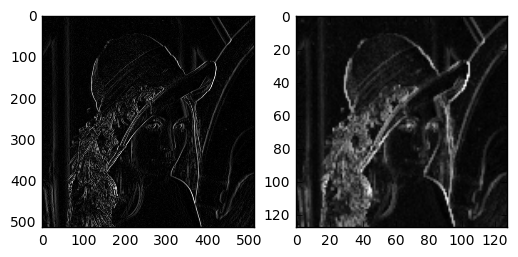

In [22]:
filtered = convolve(lena_bw, filter_sobel_vertical)

filtered=np.abs(filtered)

subplot(1,2,1)
imshow(filtered, cmap='gray')

subplot(1,2,2)
imshow(max_pool(filtered,4,4), cmap='gray')